In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
default = automap_base()
# reflect the tables
default.prepare(engine)

In [7]:
# View all of the classes that automap found
default.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = default.classes.station
Measurement = default.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

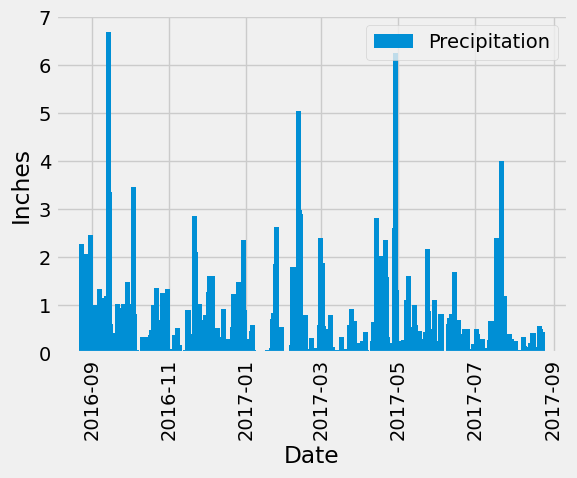

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
measurement_df = pd.DataFrame(results, columns = ["date", "precipitation"])
# Sort the dataframe by date
measurement_df['date'] = pd.to_datetime(measurement_df['date'])
measurement_df = measurement_df.sort_values(by='date')
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(6, 5))
graph = plt.bar(measurement_df['date'], measurement_df['precipitation'], width=4, label="Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(handles=[graph])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
measurement_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
locations = session.query(Station.station).distinct().count()
print("There are {} stations.".format(locations))

There are 9 stations.


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stations = most_active_stations[0][0]
temperatures = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*temperatures).all()

[(53.0, 87.0, 73.09795396419437)]

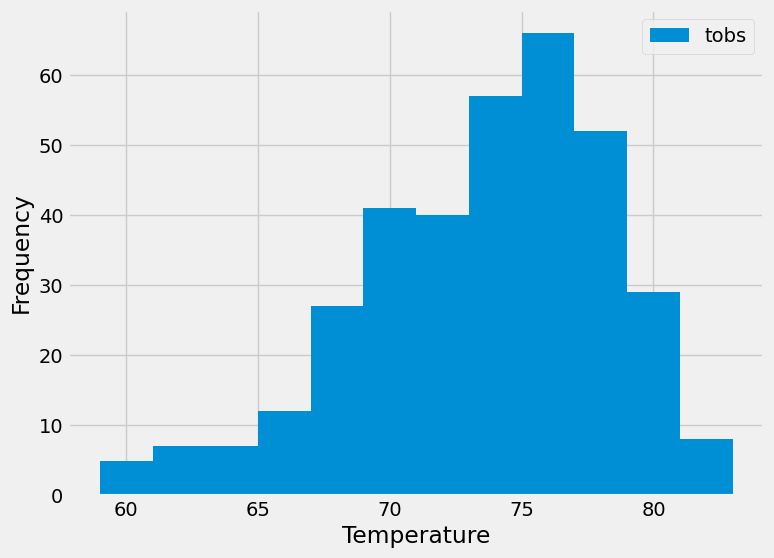

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
start_date = '2016-08-24'
end_date = '2017-08-23'
results = session.query(Measurement.tobs).order_by(Measurement.tobs).filter(Measurement.date <= end_date).filter(Measurement.date >= start_date).filter(Measurement.station==active_stations).all()
points = list(np.ravel(results))
plt.figure(figsize=(8, 6))
graph = plt.hist(points, bins=12, label="tobs")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Close Session

In [17]:
# Close Session
session.close()